In [3]:

#########################################################################
#####                                DONNEES                        #####

# • Jeu de données d’un ensemble de fromages (29 observations) décrits par leurs propriétés nutritives (ex. protéines, lipides, etc. ; 9 variables).

# • L’objectif est d’identifier des groupes de fromages homogènes, partageant des caractéristiques similaires : fromages frais, à pate molle, fromages durs,...

#########################################################################
#####                       Démarche à suivre pr le projet          #####

# • Importer les données ;
# • Réaliser des stats descriptives et representer graphiquement les données ;
# • Centrer et réduire les variables ;
# • Réaliser la classification automatique sur les données transformées via les K-Means ;
# • Détérminer le nombre optimal de classes via 2 méthodes : (1) coude "elbow" et (2) coef de la silouhette
# • Visualiser les données avec la nouvelle colonne représentant la classe d’appartenance des individus ;
# • Illustrer et interpreter les classes à l’aide des variables actives, via des stats descriptives comparatives ;
# • Réaliser une ACP et comparer les conclusions entre Kmeans et ACP
# • Classification automatique Ascendante Hiéarchique
# • Complémentarité entre CAH et kmeans ?

# • Splitter les données en train et split de telle façon d'avoir la bonne répartition ;
# Mettre en place une fonction qui permet de prédire le type d'un fromage

#########################################################################
#####                                Import                         #####

import os
import numpy as np
import pandas as pd
import sklearn
#########################################################################
#####                                   Charger les données         #####



In [4]:
print(os.getcwd())



C:\Users\hp


In [45]:
path = r"C:\Users\hp\Downloads"
os.chdir(path)
# Lecture du fichier
df = pd.read_csv("cheese.txt", sep = "\t", index_col = 0, header = 0)
df.head()




,calories,sodium,calcium,lipides,retinol,folates,proteines,cholesterol,magnesium
Fromages,,,,,,,,,
CarredelEst,314,353.5,72.6,26.3,51.6,30.3,21.0,70,20
Babybel,314,238.0,209.8,25.1,63.7,6.4,22.6,70,27
Beaufort,401,112.0,259.4,33.3,54.9,1.2,26.6,120,41
Bleu,342,336.0,211.1,28.9,37.1,27.5,20.2,90,27
Camembert,264,314.0,215.9,19.5,103.0,36.4,23.4,60,20


In [46]:
df.describe()


,calories,sodium,calcium,lipides,retinol,folates,proteines,cholesterol,magnesium
count,29.000000,29.000000,29.000000,29.000000,29.000000,29.000000,29.000000,29.000000,29.000000
mean,300.034483,210.086207,185.734483,24.158621,67.562069,13.010345,20.168966,74.586207,26.965517
std,91.914356,108.678923,72.528882,8.129642,24.163098,11.723339,6.959788,28.245755,11.318388
min,70.000000,22.000000,72.600000,3.400000,37.100000,1.200000,4.100000,10.000000,10.000000
25%,292.000000,140.000000,132.900000,23.400000,51.600000,4.900000,17.800000,70.000000,20.000000
50%,321.000000,223.000000,202.300000,26.300000,62.300000,6.400000,21.000000,80.000000,26.000000
75%,355.000000,276.000000,220.500000,29.100000,76.400000,21.100000,23.400000,90.000000,30.000000
max,406.000000,432.000000,334.600000,33.300000,150.500000,36.400000,35.700000,120.000000,51.000000


array([[<matplotlib.axes._subplots.AxesSubplot object at 0x0000029A902FB5C8>,
      dtype=object)

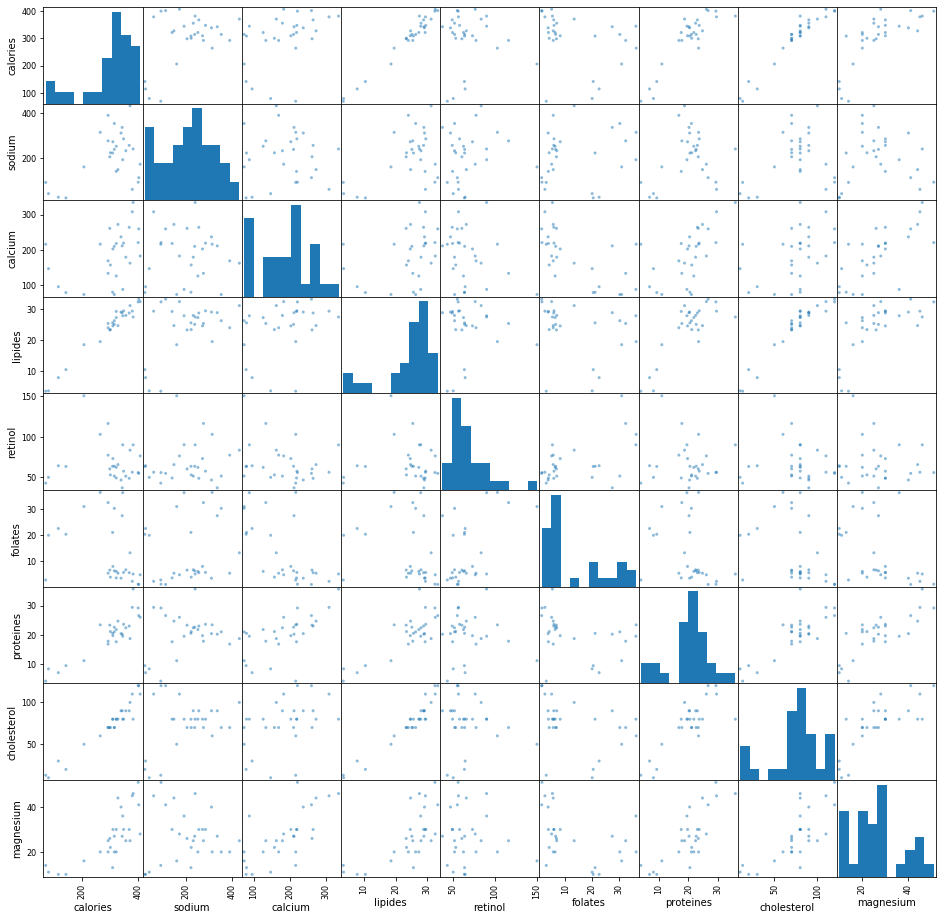

In [48]:
# Graphique avec croisement deux à deux
from pandas.plotting import scatter_matrix
from matplotlib import pyplot as plt

scatter_matrix(df, figsize = (16,16))



In [53]:
# S : Pr lire ce type de graphe, on cherche :
  # (1) les sous graphes où ns avons une relation linéaire (avec forte corrélation) :
    # Nous constatons par exemple que :
    # « lipides » est fortement corrélé avec « calories » et « cholestérol » (sans trop de surprises) ;
  # (2) les sous graphes où ns avons des groupes qui semblent apparaître naturellement :
    # ex. croisement de « sodium » et « calories »
    # ex. croisement de « protéines » et « cholestérol »

#########################################################################
#####                   Centrage et réduction des données           #####

from sklearn import preprocessing
df_cr = preprocessing.scale(df)
# df_cr est maintenant un tableau numpy

#########################################################################
#####                                kmeans                         #####

df_cr.shape
df_cr

array([[ 1.54629966e-01,  1.34296773e+00, -1.58746440e+00,
         2.68066256e-01, -6.72289850e-01,  1.50091119e+00,
         1.21518677e-01, -1.65242000e-01, -6.26309169e-01],
       [ 1.54629966e-01,  2.61392734e-01,  3.37679113e-01,
         1.17845552e-01, -1.62662483e-01, -5.73842591e-01,
         3.55479948e-01, -1.65242000e-01,  3.10054044e-03],
       [ 1.11791739e+00, -9.18507266e-01,  1.03364936e+00,
         1.14435370e+00, -5.33300568e-01, -1.02525346e+00,
         9.40383125e-01,  1.63626853e+00,  1.26191996e+00],
       [ 4.64653504e-01,  1.17909273e+00,  3.55920269e-01,
         5.93544448e-01, -1.28300033e+00,  1.25784380e+00,
         4.53804189e-03,  5.55362210e-01,  3.10054044e-03],
       [-3.98983494e-01,  9.73078448e-01,  4.23272229e-01,
        -5.83184399e-01,  1.49257351e+00,  2.03045086e+00,
         4.72460583e-01, -5.25544105e-01, -6.26309169e-01],
       [ 7.41460234e-01,  4.29949877e-01,  1.09819499e+00,
         5.81026056e-01, -7.90220150e-01, -6.346094

In [9]:
# k-means sur les données centrées et réduites
from sklearn import cluster
kmeans = cluster.KMeans(n_clusters=4, random_state = 42)
kmeans.fit(df_cr)




KMeans(algorithm='auto', copy_x=True, init='k-means++', max_iter=300,
       n_clusters=4, n_init=10, n_jobs=None, precompute_distances='auto',
       random_state=42, tol=0.0001, verbose=0)

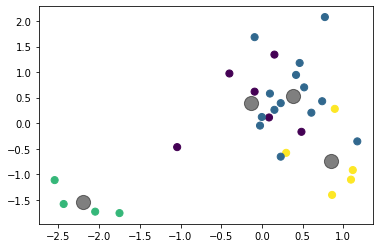

In [10]:
# Accéder au vecteur des cluster
kmeans.labels_
# S :
# array([0, 1, 3, 1, 0, 1, 0, 0, 1, 3, 0, 3, 3, 0, 1, 2, 2, 1, 1, 3, 2, 1, 1, 1, 1, 1, 1, 1, 2])

#########################################################################
#####                                Viz                         #####
y_kmeans = kmeans.predict(df_cr)
plt.figure()
plt.scatter(df_cr[ : , 0], df_cr[ : , 1], c=y_kmeans, s=50, cmap='viridis')
centers = kmeans.cluster_centers_
plt.scatter(centers[:, 0], centers[:, 1], c='black', s=200, alpha=0.5)
plt.show()




In [58]:
df['cluster'] = kmeans.labels_
df[['cholesterol','cluster']].sort_values('cluster')

,cholesterol,cluster
Fromages,,
CarredelEst,70,0
Camembert,60,0
Chabichou,80,0
Chaource,70,0
Coulomniers,80,0
Fr.chevrepatemolle,50,0
Tome,80,1
SaintPaulin,70,1
Rocquefort,100,1


In [11]:

#########################################################################
#####                            Interprétation                     #####

## Affichage des observations et leurs groupes ds un df
df['cluster'] = kmeans.labels_
df.sort_values('cluster')
# S :
# CarredelEst           0
# Camembert             0
# ...
# Tome                  1
# SaintPaulin           1
# Rocquefort            1
# ...
# Fr.frais20nat.        2
# Fr.frais40nat.        2
# Petitsuisse40         2
# Yaourtlaitent.nat.    2
# ...
# Emmental              3
# Edam                  3

# distances aux centres de classes des observations
print(kmeans.transform(df_cr))
# S :
# [[2.22366092 2.91923811 5.52563871 5.21699713] # 2.22 distance la + faible => cluster 0 pr CarredelEst
 # [3.0178739  0.74374718 5.19015189 2.79338133]
 # [5.16141204 2.85539991 7.50534896 1.14539172]  # 1.14 distance la + faible => cluster 3 pr Beaufort
 # [3.23696124 2.10536305 6.12458901 3.90039468]]


[[2.22366092 2.91923811 5.52563871 5.21699713]
 [3.0178739  0.74374718 5.19015189 2.79338133]
 [5.16141204 2.85539991 7.50534896 1.14539172]
 [3.23696124 2.10536305 6.12458901 3.90039468]
 [1.93343014 3.54292429 5.40377152 5.1027633 ]
 [4.02486207 1.19391692 6.29601131 2.20069332]
 [1.77869718 3.38720801 5.92595629 4.53017038]
 [1.03237227 3.45802005 5.55487006 5.09064158]
 [3.74803439 1.95305264 6.82455372 2.29131322]
 [5.4424737  3.42031134 7.84252968 1.35227289]
 [1.95795563 2.48915384 4.84286038 4.74937695]
 [4.22922422 2.25403853 6.12567693 1.34428719]
 [5.52630163 3.39604145 7.47787998 0.90212763]
 [3.09730277 5.54292312 5.01044821 7.09387676]
 [2.837017   1.88749301 5.28233144 4.44924466]
 [5.33113973 6.00270259 0.682889   7.60942068]
 [4.5471731  5.60590975 1.00738319 7.3223388 ]
 [4.19758324 1.52552562 6.46351268 2.4532874 ]
 [3.47104401 0.6514557  6.06067377 2.50066762]
 [5.23422932 3.59516018 7.94344639 2.11236126]
 [4.37575251 5.39884861 1.21455139 7.13235133]
 [3.08206033 

In [12]:


print(kmeans.inertia_)
# S : 73.00



73.00278330776281


*** For n_clusters = 2, inertia is 147.72801758509752 ***

*** For n_clusters = 3, inertia is 100.88230647621462 ***

*** For n_clusters = 4, inertia is 73.00278330776281 ***

*** For n_clusters = 5, inertia is 59.81136503873542 ***

*** For n_clusters = 6, inertia is 52.996614336056695 ***

*** For n_clusters = 7, inertia is 45.936559201915045 ***

*** For n_clusters = 8, inertia is 41.33962905585578 ***

*** For n_clusters = 9, inertia is 36.45613972922915 ***

*** For n_clusters = 10, inertia is 30.745450441780743 ***



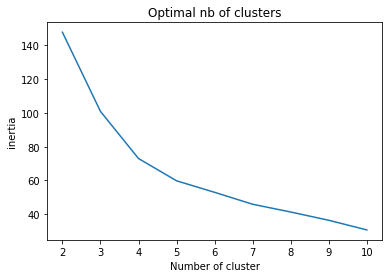

In [59]:

#########################################################################
#####              Nb optimal des clusters : méthode du coude       #####

# Stratégie : on fait varier le nbr de grpes, on surveille l’évolution de l'inertie et on cherche le « coude » dans le graphique.
# Inertia: Sum of distances of samples to their closest cluster center
# L'inertie tend à diminuer vers 0 lorsque ns augmentons k (et l'inertie est 0 lorsque k est égal au nombre de points de données => chaque point est un cluster !
# le coude représente généralement le point où nous commençons à avoir des rendements décroissants en augmentant k.

scores = {}
for k in range(2, 11):
    km = cluster.KMeans(n_clusters=k, random_state = 42)
    km.fit(df_cr)
    scores[k] = km.inertia_
    print(f'*** For n_clusters = {k}, inertia is {km.inertia_} ***\n')
plt.figure()
plt.plot(list(scores.keys()), list(scores.values()))
plt.xlabel("Number of cluster")
plt.ylabel("inertia")
plt.title("Optimal nb of clusters")
plt.show()

In [60]:

# S :
# La partition en k = 2 groupes semble la meilleure au sens de la métrique « silhouette ».

#########################################################################
#####        Nb optimal des clusters : coef de la silhouette        #####

# Selon la documentation de sklearn
# https://scikit-learn.org/stable/modules/clustering.html#silhouette-coefficient
# (...) Un score de coefficient de silhouette plus élevé se rapporte à un modèle avec des clusters mieux définis (...)

from sklearn import metrics

# Utilisation de la métrique "silhouette"
# Faire varier le nombre de clusters de 2 à 10
scores = []
for k in range(2, 11):
    km = cluster.KMeans(n_clusters = k, random_state = 42)
    km.fit(df_cr)
    score = metrics.silhouette_score(df_cr, km.labels_)
    scores.append(score)
    print(f'*** For n_clusters={k}, The Silhouette Coefficient is {score} ***\n')

print(scores)
# S :
# [0.46125628440580635, 0.40294238189905895, 0.41627447069733386, 0.3900272705972848, 0.3228464903008829, 0.3473776041463943, 0.3412276622157032, 0.25028718369271796, 0.22147311807421863]


*** For n_clusters=2, The Silhouette Coefficient is 0.4862625516965649 ***

*** For n_clusters=3, The Silhouette Coefficient is 0.360252611360855 ***

*** For n_clusters=4, The Silhouette Coefficient is 0.3454007305864028 ***

*** For n_clusters=5, The Silhouette Coefficient is 0.2968414636982328 ***

*** For n_clusters=6, The Silhouette Coefficient is 0.2728018120253337 ***

*** For n_clusters=7, The Silhouette Coefficient is 0.3061629238398813 ***

*** For n_clusters=8, The Silhouette Coefficient is 0.3045064960778338 ***

*** For n_clusters=9, The Silhouette Coefficient is 0.23990770957325236 ***

*** For n_clusters=10, The Silhouette Coefficient is 0.23716487406229378 ***

[0.4862625516965649, 0.360252611360855, 0.3454007305864028, 0.2968414636982328, 0.2728018120253337, 0.3061629238398813, 0.3045064960778338, 0.23990770957325236, 0.23716487406229378]


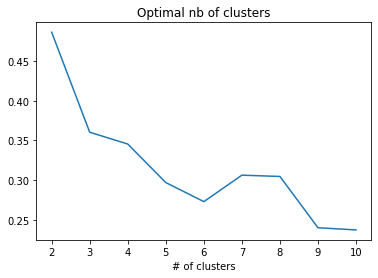

In [15]:

# Graphique
plt.figure()
plt.title("Silhouette")
plt.xlabel("# of clusters")
plt.plot(range(2, 11, 1), scores)
plt.title("Optimal nb of clusters")
plt.show()


In [16]:
# S :
# La partition en k = 2 groupes semble la meilleure au sens de la métrique « silhouette ».

#########################################################################
#####                            Coude vs Silouhette                #####

# Q : Pourquoi les résultats divergent entre la métrique du coude et silhouette ?

# R : Des divergences entre les résultats des diff méthodes sont possibles, Choisir le n° optimal. du cluster dépendra du type de jeux de données et du problème que nous essayons de résoudre. Mais la plupart des cas, la prise du coefficient de silhouette le plus élevé produira un nombre optimal de grappes.

#########################################################################
#####                       Interprétation des classes              #####
# Moyenne par variable
m = df.mean()

# TSS
TSS = df.shape[0]*df.var(ddof=0)
print(TSS)



calories       236550.965517
sodium         330711.034483
calcium        147292.285517
lipides          1850.550345
retinol         16347.948276
folates          3848.226897
proteines        1356.282069
cholesterol     22339.034483
magnesium        3586.965517
cluster            27.793103
dtype: float64


In [17]:
#data.frame conditionnellement aux groupes
gb = df.groupby(kmeans.labels_)

#effectifs conditionnels
nk = gb.size()
print(nk)



0     6
1    14
2     4
3     5
dtype: int64


In [18]:
#moyennes conditionnelles
mk = gb.mean()
print(mk)



     calories      sodium  calcium    lipides    retinol    folates  \
0  288.000000  252.916667   110.10  23.866667  95.866667  31.266667   
1  334.285714  267.428571   199.70  27.500000  60.050000   7.728571   
2  101.750000   44.750000   133.75   6.275000  55.150000  16.475000   
3  377.200000  130.400000   278.98  29.460000  64.560000   3.120000   

   proteines  cholesterol  magnesium  cluster  
0  18.883333    68.333333  21.666667        0  
1  21.228571    83.571429  27.142857        1  
2   7.200000    18.250000  11.250000        2  
3  29.120000   102.000000  45.400000        3  


In [19]:
#pour chaque groupe ecart à la moyenne par variable
EMk = (mk-m)**2

#pondéré par les effectifs du groupe
EM = EMk.multiply(nk,axis=0)

#somme des valeurs => BSS
BSS = np.sum(EM,axis=0)
print(BSS)



calories       204332.558374
sodium         198134.447578
calcium         91337.127517
lipides          1576.637511
retinol          6258.237943
folates          2927.429492
proteines        1099.017164
cholesterol     17817.522578
magnesium        2855.967898
cluster            27.793103
dtype: float64


In [20]:
#carré du rapport de corrélation
#variance expliquée par l'appartenance aux groupes
#pour chaque variable
R2 = BSS/TSS
print(R2)



calories       0.863799
sodium         0.599117
calcium        0.620108
lipides        0.851983
retinol        0.382815
folates        0.760722
proteines      0.810316
cholesterol    0.797596
magnesium      0.796207
cluster        1.000000
dtype: float64


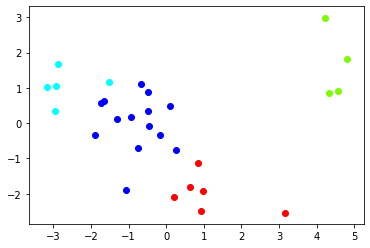

In [21]:
#########################################################################
#####                                        ACP                    #####

from sklearn.decomposition import PCA
acp = PCA(n_components=2).fit_transform(df_cr)

#projeter dans le plan factoriel
#avec un code couleur selon le groupe
for couleur,k in zip(['red','blue','lawngreen','aqua'],[0,1,2,3]):
    plt.scatter(acp[kmeans.labels_==k,0],acp[kmeans.labels_==k,1],c=couleur)
plt.show()



In [22]:
#retirer des observations le groupe n°0 des k-means
df_subset = df.iloc[kmeans.labels_!=0,:]
print(df_subset.shape)



(23, 10)


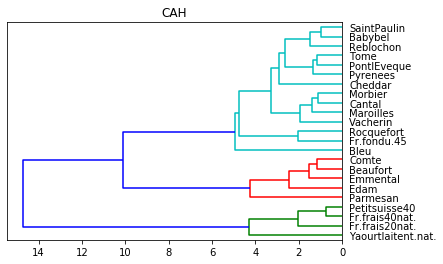

In [31]:
#centrer et réduire
df_subset_cr = preprocessing.scale(df_subset)
#####
from scipy.cluster.hierarchy import linkage, dendrogram, fcluster
#générer la matrice des liens
Z_subset = linkage(df_subset_cr,method='ward',metric='euclidean')

#cah et affichage du dendrogramme
plt.title("CAH")
dendrogram(Z_subset,labels=df_subset.index,orientation='left',color_threshold=7)
plt.show()


In [32]:
#groupes
groupes_subset_cah = fcluster(Z_subset,t=7,criterion='distance')
print(groupes_subset_cah)

[3 2 3 3 3 2 2 2 3 1 1 3 3 2 1 3 3 3 3 3 3 3 1]


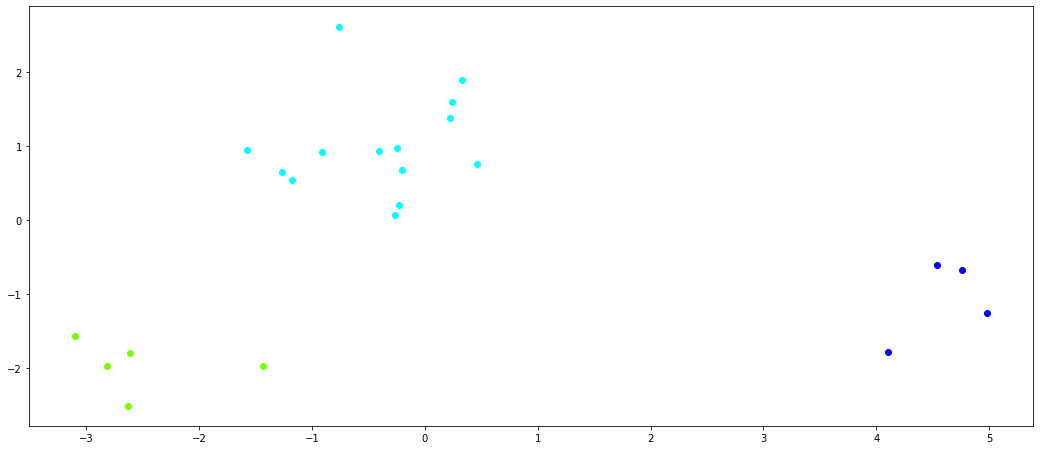

In [33]:


#ACP
acp_subset = PCA(n_components=2).fit_transform(df_subset_cr)

#projeter dans le plan factoriel
#avec un code couleur selon le groupe
plt.figure(figsize=(18,7.715))
for couleur,k in zip(['blue','lawngreen','aqua'],[1,2,3]):
    plt.scatter(acp_subset[groupes_subset_cah==k,0],acp_subset[groupes_subset_cah==k,1],c=couleur)


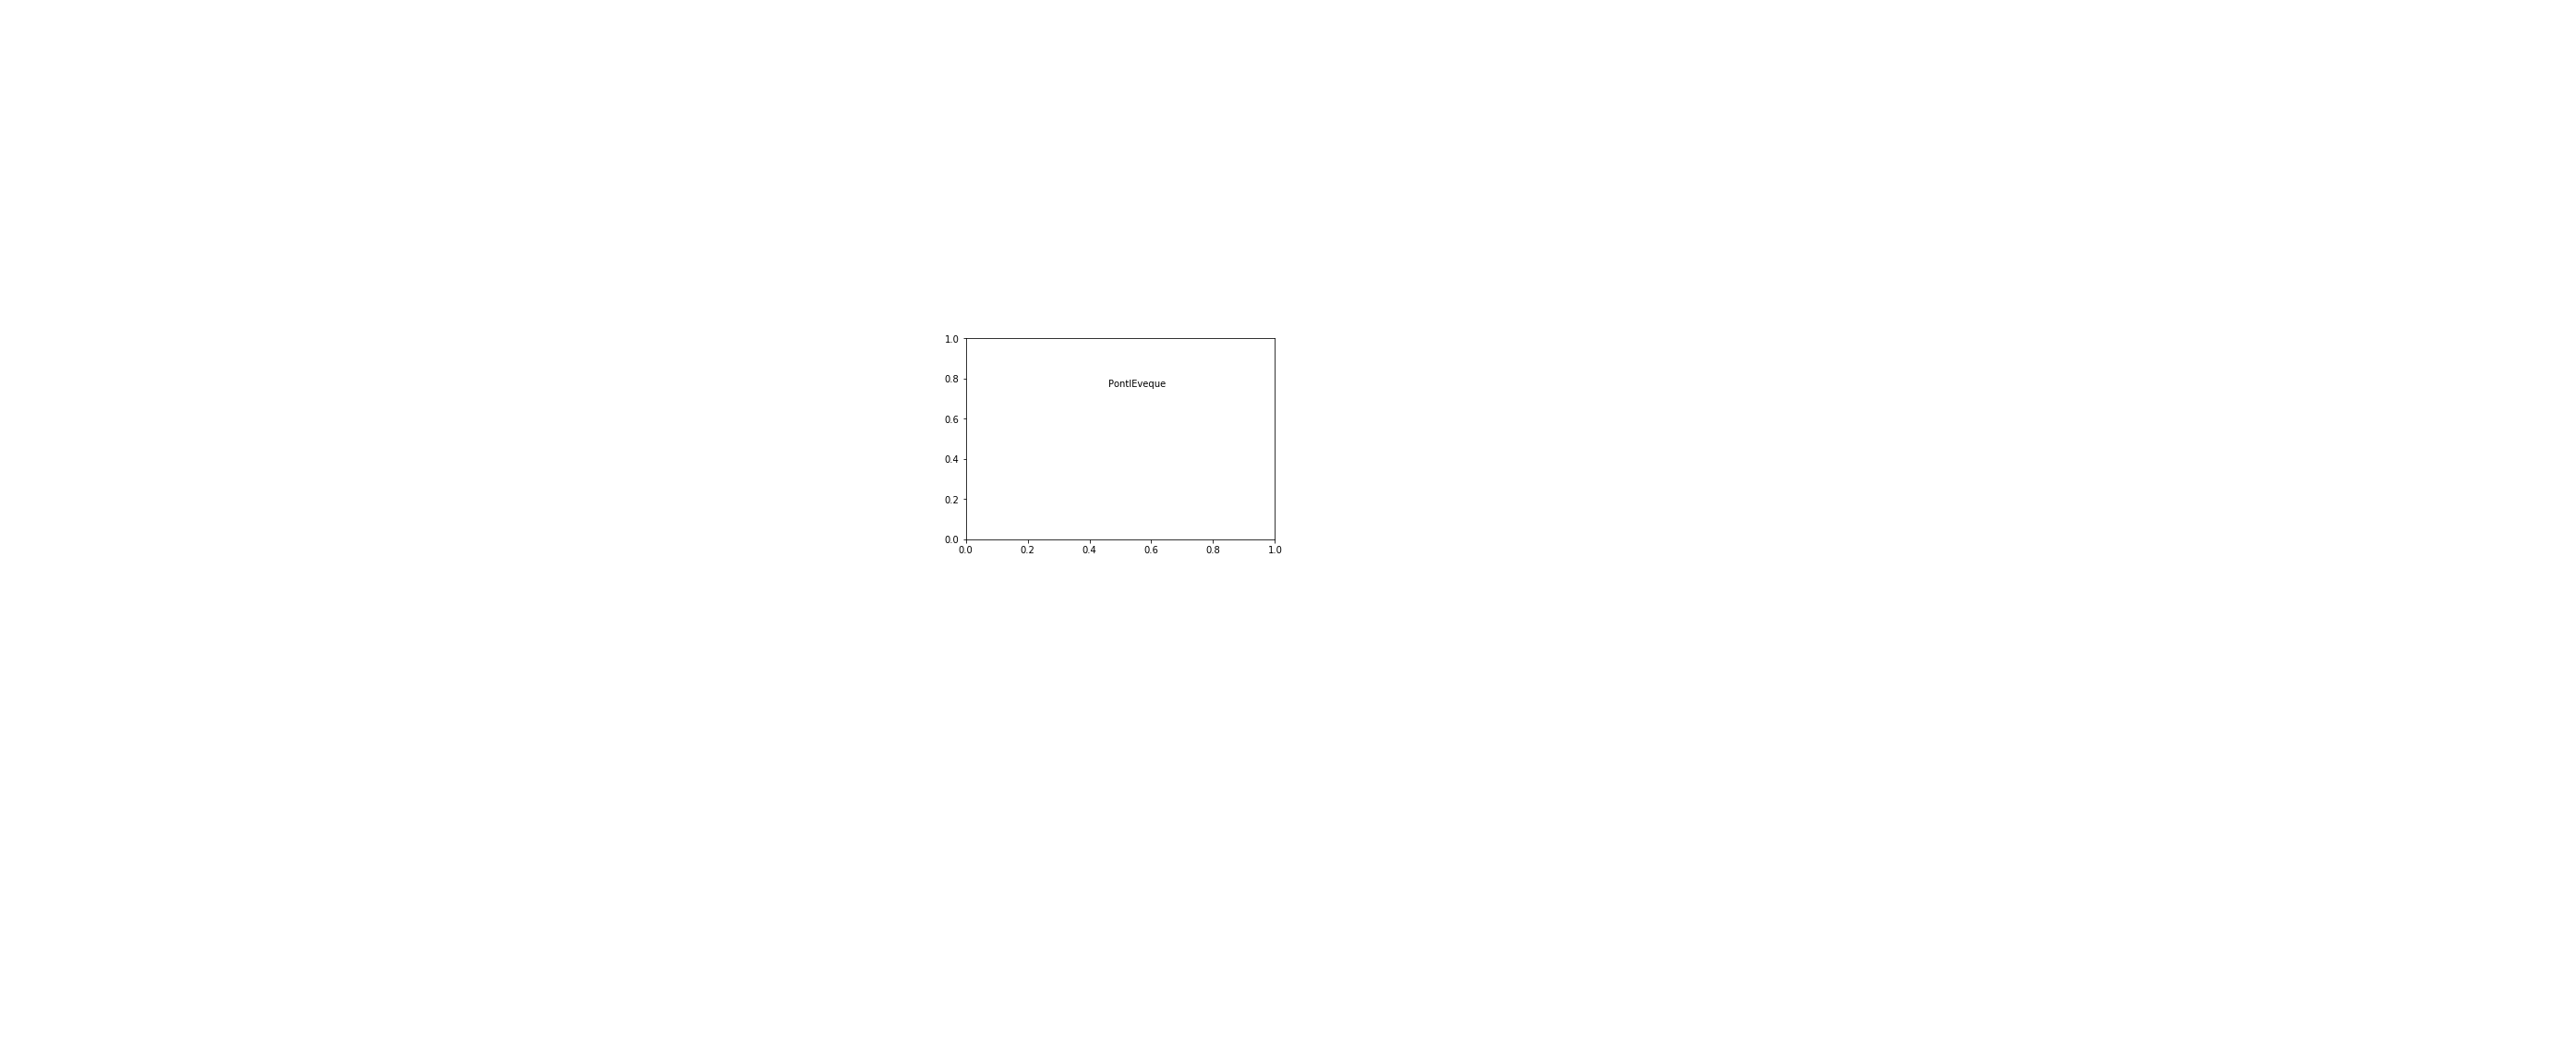

In [34]:

#mettre les labels des points
for i,label in enumerate(df_subset.index):
    plt.annotate(label,(acp_subset[i,0],acp_subset[i,1]))
plt.show()



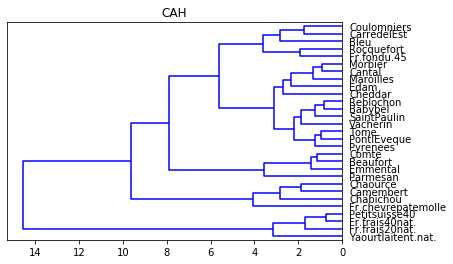

In [36]:

#########################################################################
#####                       Frontières de décision                  #####
# kmeans avec plus de 2 features

# a = np.arange(start = df_cr[:, 0].min() - 1, stop = df_cr[:, 0].max() + 1, step=0.1)
# b = np.arange(start = df_cr[:, 0].min() - 1, stop = df_cr[:, 0].max() + 1, step=0.1)

# XX, YY = np.meshgrid(a, b)
# input_array = np.array([XX.ravel(), YY.ravel()]).T
# labels = kmeans.predict(input_array)
# centers = kmeans.cluster_centers_

# plt.contourf(XX, YY, labels.reshape(XX.shape))
# plt.scatter(x=X.values[:, 0], y=X.values[:, 1], c=y, edgecolors='red')
# plt.scatter(centers[:, 0], centers[:, 1], c='black', s=200, alpha=0.8, marker='^')

# # plt.show()

# labels_kmeans = kmeans.predict(input_array_outlier)
# centers = kmeans.cluster_centers_
# plt.contourf(XX_outlier, YY_outlier, labels_kmeans.reshape(XX_outlier.shape))
# plt.scatter(X_train_outlier.values[:,0],X_train_outlier.values[:,1], c=y_train_outlier, edgecolors='red', alpha = 0.75)
# plt.scatter(centers[:, 0], centers[:, 1], c='black', s=200, alpha=0.8, marker='^')

#########################################################################
#####                                CAH                            #####

#librairies pour la CAH
import matplotlib.pyplot as plt
from scipy.cluster.hierarchy import dendrogram, linkage, fcluster

#générer la matrice des liens
Z = linkage(df_cr,method='ward',metric='euclidean')
print()
#affichage du dendrogramme
plt.title("CAH")
dendrogram(Z,labels=df.index,orientation='left',color_threshold=0)
plt.show()




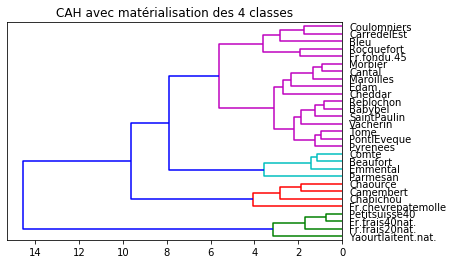

In [37]:

#matérialisation des 4 classes (hauteur t = 7)
plt.title('CAH avec matérialisation des 4 classes')
dendrogram(Z,labels=df.index,orientation='left',color_threshold=7)
plt.show()



In [38]:
#découpage à la hauteur t = 7 ==> 4 identifiants de groupes obtenus
groupes_cah = fcluster(Z,t=7,criterion='distance')
print(groupes_cah)



[4 4 3 4 2 4 2 2 4 3 4 4 3 2 4 1 1 4 4 3 1 4 4 4 4 4 4 4 1]


In [41]:
#index triés des groupes
import numpy as np
idg = np.argsort(groupes_cah)

#affichage des observations et leurs groupes
print(pd.DataFrame(df.index[idg],groupes_cah[idg]))



             Fromages
1  Yaourtlaitent.nat.
1      Fr.frais20nat.
1       Petitsuisse40
1      Fr.frais40nat.
2  Fr.chevrepatemolle
2           Camembert
2           Chabichou
2            Chaource
3            Emmental
3            Parmesan
3            Beaufort
3               Comte
4            Pyrenees
4         PontlEveque
4          Rocquefort
4         SaintPaulin
4                Tome
4           Reblochon
4         CarredelEst
4           Maroilles
4            Vacherin
4                Edam
4         Coulomniers
4             Cheddar
4              Cantal
4                Bleu
4             Babybel
4             Morbier
4         Fr.fondu.45


In [42]:


#correspondance avec les groupes de la CAH
pd.crosstab(groupes_cah,kmeans.labels_)



col_0,0,1,2,3
row_0,,,,
1,0,0,4,0
2,4,0,0,0
3,0,0,0,4
4,2,14,0,1
